In [2]:
import numpy.linalg as nla
import scipy.linalg as sla
import numpy as np
from numpy import identity as id
from pylab import *
import cmath as cm
import random
import matplotlib.pyplot as plt
import cmath
from itertools import compress, product

In [3]:

def Herm(A):
    A = np.transpose(np.conj(A))
    return A

def NKron(*args):
  """Calculate a Kronecker product over a variable number of inputs"""
  result = np.array([[1.0]])
  for op in args:  
    result = np.kron(result, op)
  return result

#Spin states in the z-basis
up = np.array([1, 0])
down = np.array([0, 1])
Spin=[up,down]
#Spin matrices
PX = np.array([[0, 1],[ 1, 0]])
PZ = np.array([[1, 0],[0, -1]])
PY = np.array([[0, -1.0*cm.sqrt(-1.0)], [cm.sqrt(-1.0), 0]])

def Ham(N):
    
    H=np.zeros((2**N,2**N), dtype=np.complex128)
    H=H+J*(NKron(PX,PX,id(2**(N-2)))+NKron(id(2**(N-2)),PX,PX)+NKron(PY,PY,id(2**(N-2)))+NKron(id(2**(N-2)),PY,PY)) + U*(NKron(PZ,PZ,id(2**(N-2)))+NKron(id(2**(N-2)),PZ,PZ))
    i=1
    while i<N-1:
        H=H+J*(NKron(id(2**i),PX,PX,id(2**(N-2-i))))
        H=H+J*(NKron(id(2**i),PY,PY,id(2**(N-2-i))))
        H=H+U*(NKron(id(2**i),PZ,PZ,id(2**(N-2-i))))
        i+=1
    i=0
    while i<N:
        H=H+random.uniform(-h,h)*(NKron(id(2**i),PZ,id(2**(N-i-1))))
        H=H+Xi*(NKron(id(2**i),PX,id(2**(N-i-1))))
        i+=1
    
    EigVals = nla.eigvalsh(H)
    return EigVals



In [17]:
Values=[]
Basis=[]
SpinTot=[]
Ratio=[]
Average=[] 
Basis=id(2**N,dtype=np.complex128)
Mean=[]

RatioVector1=[]
RatioVector2=[]
RatioVector3=[]
RatioVector4=[]

RatioMatrix1=[]
RatioMatrix2=[]
RatioMatrix3=[]
RatioMatrix4=[]

ErrorList1=[]
ErrorList2=[]
ErrorList3=[]
ErrorList4=[]

In [5]:

N=int(6)
Repeats=100
J=1
U=0.5
h=0
Time=10
t=0.01
Xi=0
while N < 14:
    R=0

    while R<Repeats:
        h=0.5
        Ratio=[]
        while h<10:
        
            EigVals = Ham(N)

            i=0
            Mean=[]
            while i<2**(N)-2:
                Variable1 = EigVals[i+1]-EigVals[i]
                Variable2= EigVals[i+2] - EigVals[i+1]
                Mean.append(min(Variable1, Variable2)/max(Variable1, Variable2))
                i+=1
            Ratio.append(np.average(Mean))

            h+=0.25
    
        R+=1
        if R%25==0:
            print(R)
        if N==6:
            RatioMatrix1.append(np.transpose(Ratio))
        elif N==8:
            RatioMatrix2.append(np.transpose(Ratio))
        elif N==10:
            RatioMatrix3.append(np.transpose(Ratio))
        elif N==12:
            RatioMatrix4.append(np.transpose(Ratio)) 
                       
    N+=2
    print(N)       

RatioMatrix1=np.transpose(RatioMatrix1)
RatioMatrix2=np.transpose(RatioMatrix2)
RatioMatrix3=np.transpose(RatioMatrix3)
RatioMatrix4=np.transpose(RatioMatrix4)


i=0
while i<38:
    RatioVector1.append(np.average(RatioMatrix1[i]))
    RatioVector2.append(np.average(RatioMatrix2[i]))
    
    RatioVector3.append(np.average(RatioMatrix3[i]))
    
    RatioVector4.append(np.average(RatioMatrix4[i]))
    
    
    ErrorList1.append((np.std(RatioMatrix1[i]))/np.sqrt(len(RatioVector1)))
    ErrorList2.append((np.std(RatioMatrix2[i]))/np.sqrt(len(RatioVector1)))
    
    ErrorList3.append((np.std(RatioMatrix3[i]))/np.sqrt(len(RatioVector1)))
    
    ErrorList4.append((np.std(RatioMatrix4[i]))/np.sqrt(len(RatioVector1)))
    
    
    i+=1

25
50
75
100
8
25
50
75
100
10
25
50
75
100
12
25
50
75
100
14


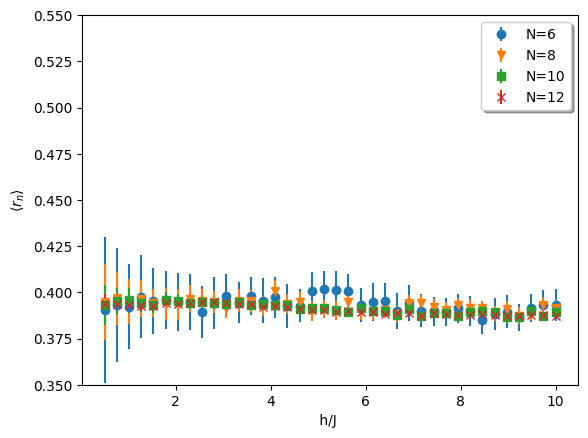

In [11]:
x=np.linspace(0.5,10,num=38)

#plt.plot(x,RatioVector1, label="N=6")
plt.errorbar(x,RatioVector1, yerr=ErrorList1, fmt='o',label="N=6")

#plt.plot(x,RatioVector2, label="N=8")
plt.errorbar(x,RatioVector2, yerr=ErrorList2, fmt='v', label="N=8")

#plt.plot(x,RatioVector3, label="N=10")
plt.errorbar(x,RatioVector3, yerr=ErrorList3, fmt='s', label="N=10")

#plt.plot(x,RatioVector4, label="N=12")
plt.errorbar(x,RatioVector4, yerr=ErrorList4, fmt='x', label="N=12")


plt.ylim((0.35,0.55))
plt.xlabel(' h/J  ')
plt.ylabel(r'$ \langle r_{n} \rangle $')

plt.legend(loc='upper right', shadow = True)

#plt.xlim((3.5,5.5))
#plt.ylim((0.4,0.5))
plt.xlabel(' h/J  ')
plt.ylabel(r'$ \langle r_{n} \rangle $')
plt.savefig('LevelSpace_h-0_chi-0.png', bbox_inches='tight', dpi = 600)
plt.show()

In [14]:
Errors = np.column_stack((ErrorList1,ErrorList2,ErrorList3,ErrorList4))
np.savetxt('Errors_h-0_ch-0.txt', Errors)

In [15]:
Ratio = np.column_stack((RatioVector1,RatioVector2,RatioVector3,RatioVector4))
np.savetxt('Ratio_Vec_h-0_ch-0.txt', Ratio)

In [18]:

N=int(6)
Repeats=10
J=1
U=0.5
h=0
Time=10
t=0.01
Xi=0.5
while N < 14:
    R=0

    while R<Repeats:
        h=0.5
        Ratio=[]
        while h<10:
        
            EigVals = Ham(N)

            i=0
            Mean=[]
            while i<2**(N)-2:
                Variable1 = EigVals[i+1]-EigVals[i]
                Variable2= EigVals[i+2] - EigVals[i+1]
                Mean.append(min(Variable1, Variable2)/max(Variable1, Variable2))
                i+=1
            Ratio.append(np.average(Mean))

            h+=0.25
    
        R+=1
        if R%2==0:
            print(R)
        if N==6:
            RatioMatrix1.append(np.transpose(Ratio))
        elif N==8:
            RatioMatrix2.append(np.transpose(Ratio))
        elif N==10:
            RatioMatrix3.append(np.transpose(Ratio))
        elif N==12:
            RatioMatrix4.append(np.transpose(Ratio)) 
                       
    N+=2
    print(N)       

RatioMatrix1=np.transpose(RatioMatrix1)
RatioMatrix2=np.transpose(RatioMatrix2)
RatioMatrix3=np.transpose(RatioMatrix3)
RatioMatrix4=np.transpose(RatioMatrix4)


i=0
while i<38:
    RatioVector1.append(np.average(RatioMatrix1[i]))
    RatioVector2.append(np.average(RatioMatrix2[i]))
    
    RatioVector3.append(np.average(RatioMatrix3[i]))
    
    RatioVector4.append(np.average(RatioMatrix4[i]))
    
    
    ErrorList1.append((np.std(RatioMatrix1[i]))/np.sqrt(len(RatioVector1)))
    ErrorList2.append((np.std(RatioMatrix2[i]))/np.sqrt(len(RatioVector1)))
    
    ErrorList3.append((np.std(RatioMatrix3[i]))/np.sqrt(len(RatioVector1)))
    
    ErrorList4.append((np.std(RatioMatrix4[i]))/np.sqrt(len(RatioVector1)))
    
    
    i+=1

2
4
6
8
10
8
2
4
6
8
10
10
2
4
6
8
10
12
2
4
6
8
10
14
